In [14]:
import numpy as np
import pylab as plt
import pandas as pd
import tensorflow as tf
import pickle

def gload(gsname):
    with tf.io.gfile.GFile(gsname, "rb") as file:
        obj = pickle.load(file)
    return obj

def load_precomp(basedir):
    Ms = gload(f'{basedir}/Mlist')
    ks = gload(f'{basedir}/ks')
    return Ms, ks

def load(name):
    return load_precomp(f'gs://hml-public/dd/{name}')

Ms, ks = load('cifar10-resnet18k-p15-adam-reps')

## Simple Plot

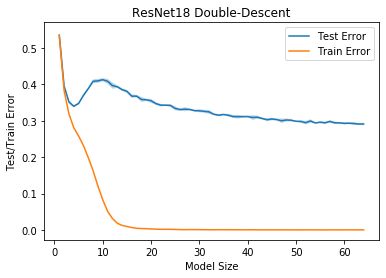

In [12]:
## data format:
## Ms[i]['Test Error'][s, epoch] : Test Error of model of size s, at epoch. For trial i (of 5 trials).

errs = np.array([M['Test Error'][:, -1] for M in Ms])

p = 0.15 # fraction of noise
errs = 1.0 - (1-p)*(1-errs) + errs*p/9.0 # remap clean test error --> noisy test error.

stds = np.std(errs, axis=0)
mean = np.mean(errs, axis=0)
train_err = np.mean([M['Train Error'][:, -1] for M in Ms], axis=0)


fig, ax = plt.subplots()
ax.plot(ks, mean, label='Test Error')
ax.plot(ks, train_err, label='Train Error')
ax.fill_between(ks, mean-stds, mean+stds ,alpha=0.3)
ax.set_xlabel("Model Size")
ax.set_ylabel("Test/Train Error")
ax.set_title("ResNet18 Double-Descent")
ax.legend()

## Fancier Plot

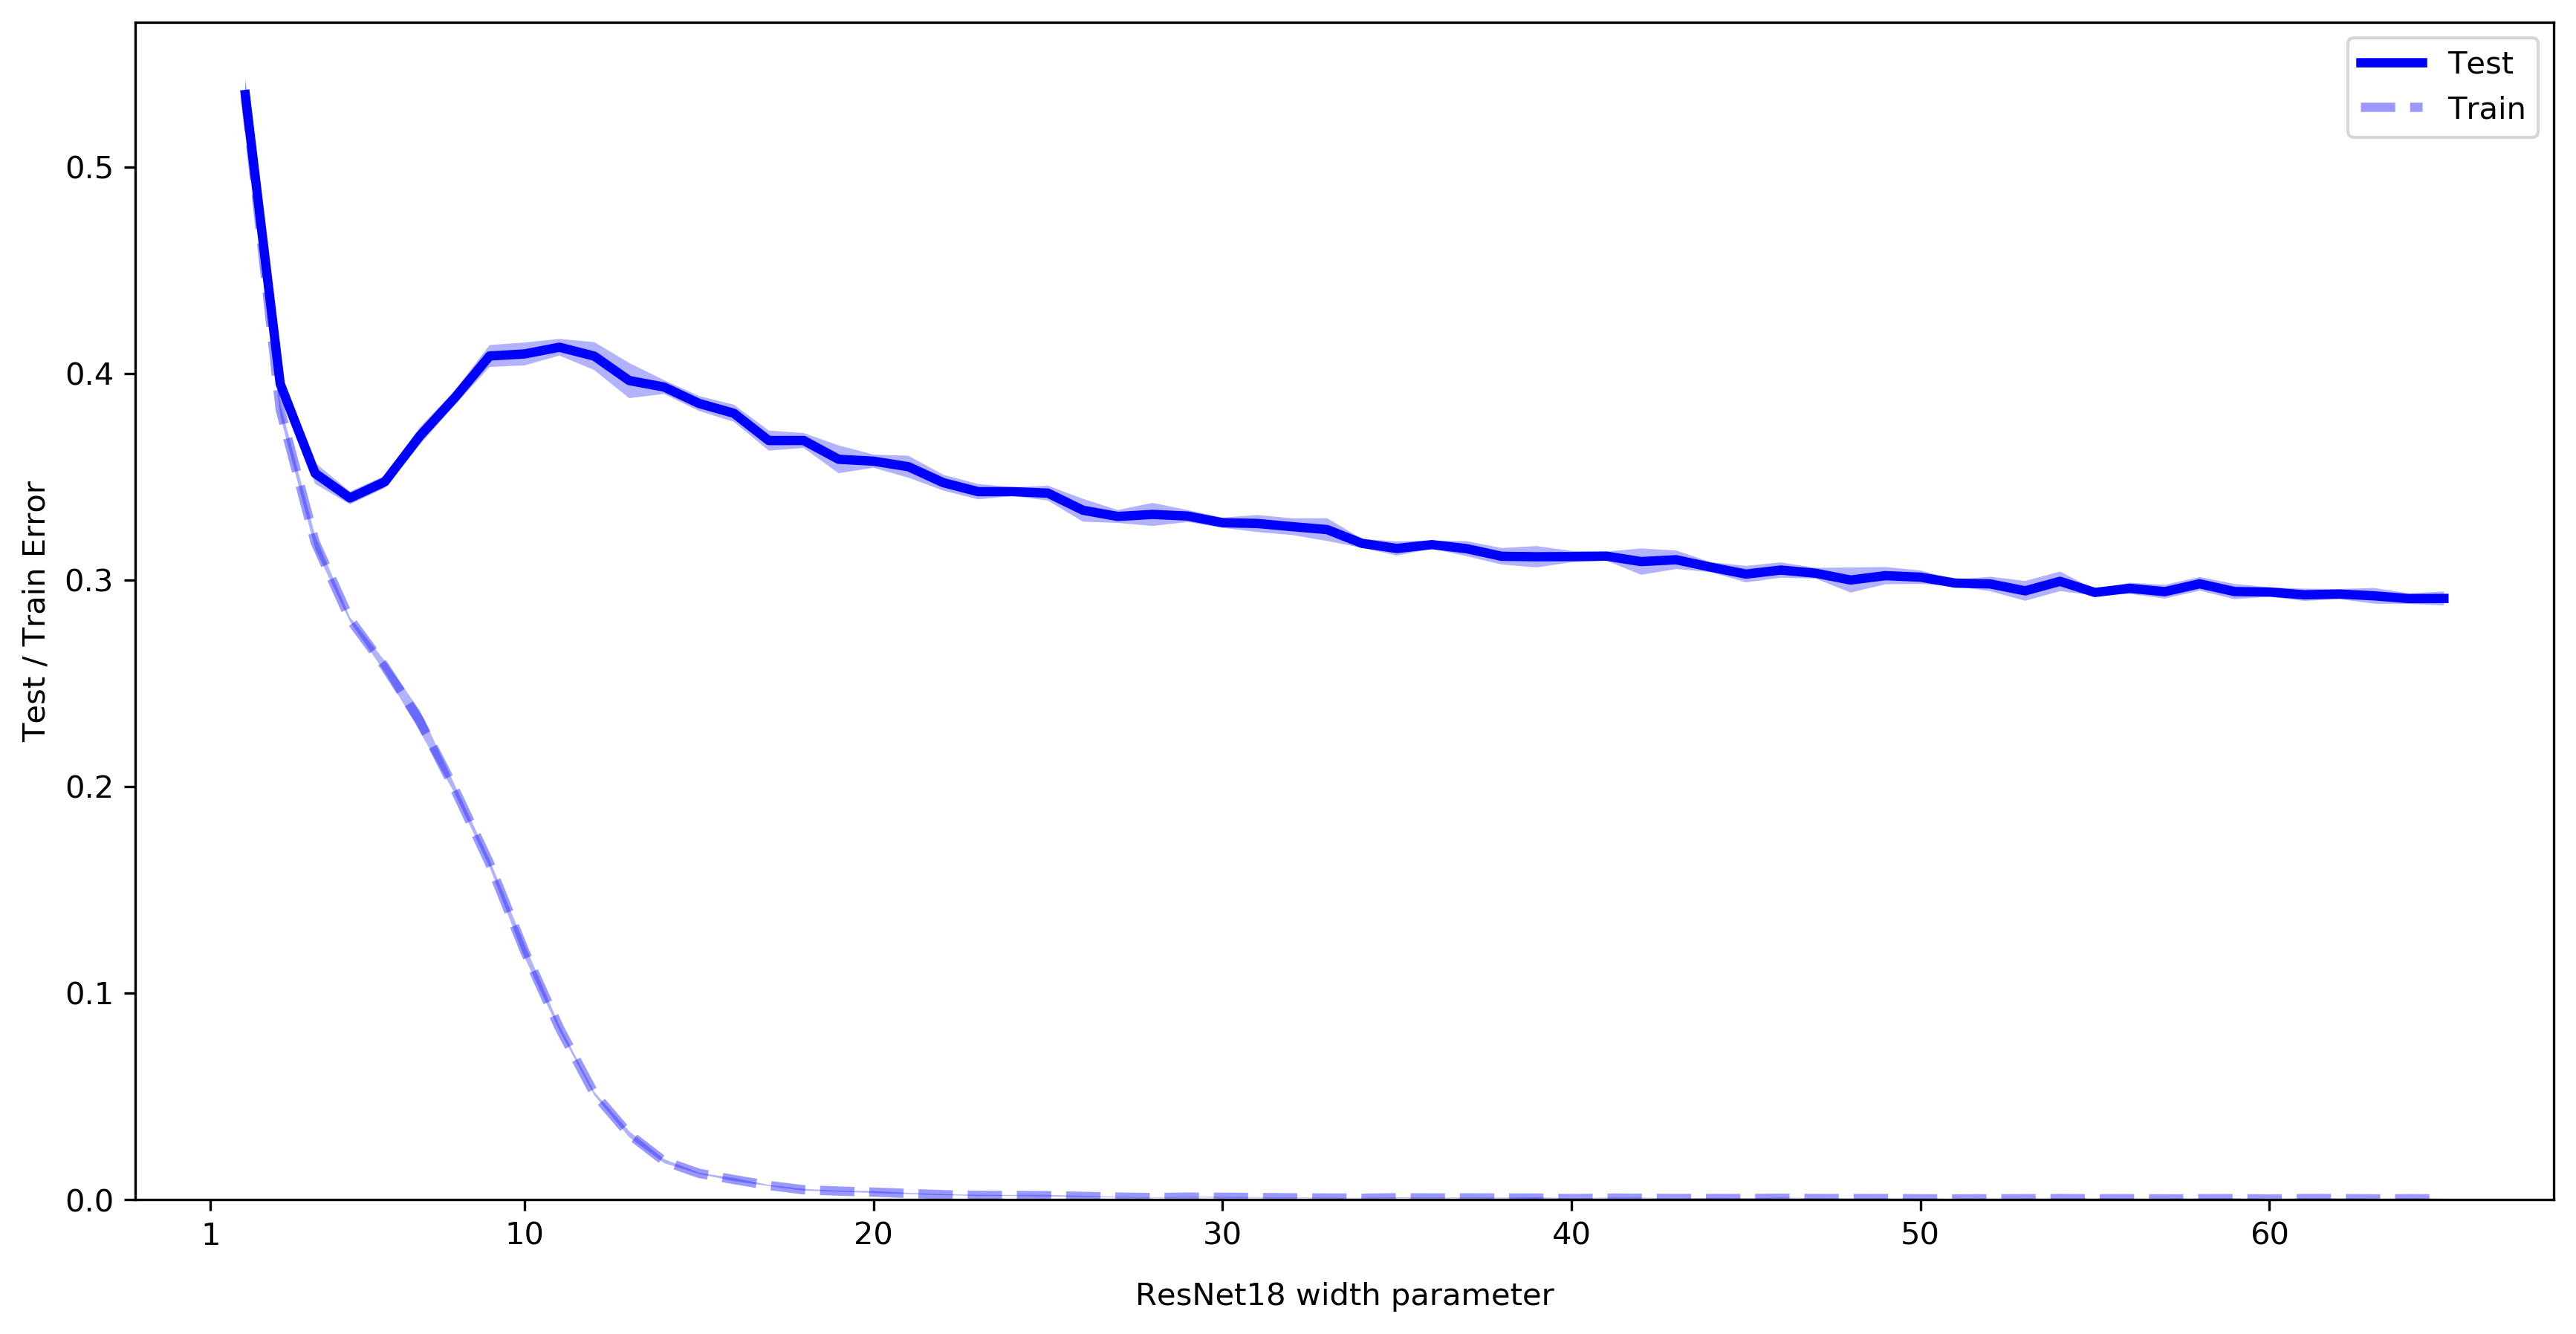

In [13]:
def plot(Ms, ks, savepath=None,
             noise_level=0.15,
             linewidth=3, marker_size=4):
    # Ms: List of the line plots for eg: if plotting three noise levels this has length 3
    
    #plt.style.reload_library()
    #plt.style.use('~/hml-common/mplstyles/twocol.mpl')
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=300)

    p=noise_level
    errs_te = np.array([M['Test Error'][:, -1] for M in Ms])
    errs_te = 1.0 - (1-p)*(1-errs_te) + errs_te*p/9.0 # noisy test
    stds_te = np.std(errs_te, axis=0)
    mean_te = np.mean(errs_te, axis=0)
    
    errs_tr = np.array([M['Train Error'][:, -1] for M in Ms])
    stds_tr = np.std(errs_tr, axis=0)
    mean_tr = np.mean(errs_tr, axis=0)
    

    ax.plot(ks, mean_te, '-', color='b',
            ms=marker_size, lw=linewidth, label='Test')
    ax.fill_between(ks, mean_te-stds_te, mean_te+stds_te ,alpha=0.3, facecolor='b')
    
    ax.plot(ks, mean_tr, '--', color='b',
            lw=linewidth, alpha=0.4, label='Train')    
    ax.fill_between(ks, mean_tr-stds_tr, mean_tr+stds_tr ,alpha=0.3, facecolor='b')
    
    
    #X-axis
    q = np.arange(len(ks))
    x_idx = [q[0]] + list(q[9::10])
    x_steps = np.array(ks)[x_idx]
    x_labs = ['%d' % x for x in x_steps]
    ax.set_xticks(x_idx)
    ax.set_xticklabels(x_labs)
    ax.set_xlabel('ResNet18 width parameter')
    ax.xaxis.labelpad = 10

    ax.set_ylabel('Test / Train Error')
    ax.set_ylim(bottom=0.0, top=None)
    ax.legend(loc='upper right')
    
    plt.show()


    
plot(Ms, ks,
     savepath=None,
     noise_level=0.15,
     linewidth=3, marker_size=4)